# 2.3 异常数据处理

异常值问题在数据分析中经常遇到，本节介绍了多种处理数据异常值的方法。

在金融数据分析中，常常会遇到一些值过大或者过小的情况，当用这些值来构造其他特征的时候，可能使得其他的特征也是异常点，这将严重影响对金融数据的分析，或者是影响模型的训练，下面我们学习一些关于异常点处理的常用方法。

## A. 固定比例法

这种方法非常容易理解，我们把上下2%的值重新设置，若大于99%分位数的数值，则将其设置为99%分位数值，若低于1%分位数的数值，则将其重新设置为1%分位数值



In [1]:
import pandas
df= pandas.read_csv("datasets/Facebook.csv", index_col=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,12.60,12.13,12.20,12.59,40510800.0,10.255996
2017-01-04,13.27,12.74,12.77,13.17,77638100.0,10.728471
2017-01-05,13.22,12.63,13.21,12.77,75628400.0,10.402627
2017-01-06,12.84,12.64,12.80,12.76,40315900.0,10.394479
2017-01-09,12.86,12.63,12.79,12.63,39438400.0,10.288579


<AxesSubplot:>

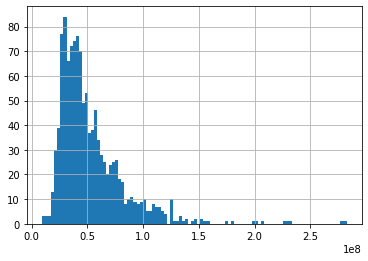

In [2]:
df['Volume'].hist(bins=100)

均值 52533770.73047859
标准差 26834906.704301823


<AxesSubplot:>

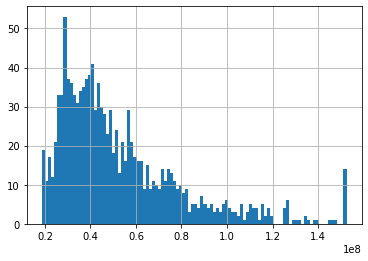

In [3]:
vol = df['Volume'].copy()
vol[vol>=vol.quantile(0.99)] = vol.quantile(0.99)
vol[vol<=vol.quantile(0.01)] = vol.quantile(0.01)
print("均值", vol.mean())
print("标准差", vol.std())
vol.hist(bins=100)

## B. 均值标准差法

这种想法的思路来自正态分布，通常把3倍标准差之外的值都视为异常值，不过要注意的是样本均值和样本标准差都不是稳健统计量，其计算本身受极值的影响就非常大，所以可能会出现一种情况，那就是我们从数据分布图上能非常明显地看到异常点，按照上面的计算方法，这个异常点可能仍在均值3倍标准差的范围内。因此按照这种方法剔除掉异常值后，需要重新观察数据的分布情况，看是否仍然存在显著异常点，若存在则继续重复上述步骤寻找异常点


均值 52369794.43133675
标准差 26441619.817123003


<AxesSubplot:>

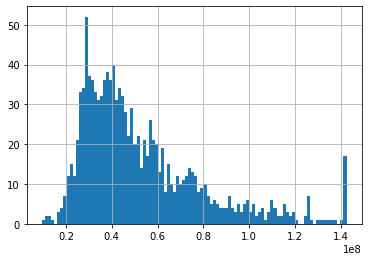

In [4]:
vol = df['Volume'].copy()
vol[vol >= vol.mean() + 3*vol.std()] = vol.mean() + 3*vol.std()
vol[vol <= vol.mean() - 3*vol.std()] = vol.mean() - 3*vol.std()
print("均值", vol.mean())
print("标准差", vol.std())
vol.hist(bins=100)

## C. MAD法

MAD法是针对均值标准差方法的改进，把均值和标准差替换成稳健统计量，样本均值用样本中位数代替，样本标准差用样本MAD（ median absolute deviation）代替：

$$
md=median(x_i, i=1, 2,..,n)
$$

$$
MAD=median(\lvert x_i-md \rvert,i=1,2,…,n)
$$


一般将偏离中位数3倍以上的数据作为异常值，和均值标准差法相比，其中位数和MAD不受异常值的影响。



均值 46474000.91575091
标准差 17950707.881291687


<AxesSubplot:>

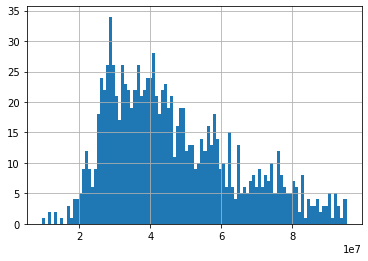

In [5]:
import numpy as np
vol = df['Volume'].copy()
vol = vol.dropna()
median = np.median(list(vol))
MAD = np.mean(abs(vol) - median)
vol = vol[abs(vol-median)/MAD<=6] #剔除偏离中位数6倍以上的数据
print("均值", vol.mean())
print("标准差", vol.std())
vol.hist(bins=100)

## D. BOXPLOT法
箱形图如下：

![boxplot](image/boxplot.png)

异常值被定义为小于QL-1.5IQR或大于QU+1.5IQR的值：
- QL称为下四分位数
- QU称为上四分位数
- IQR称为四分位区间，也即是上四分位数和下四分位数之差。
- 上限：QU+1.5IQR
- 下限：QL-1.5IQR

<AxesSubplot:>

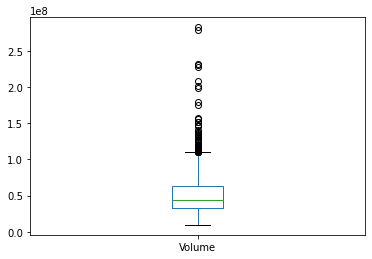

In [11]:
import pandas as pd
vol = pd.DataFrame(df['Volume'])
vol.boxplot(grid=False)

<AxesSubplot:>

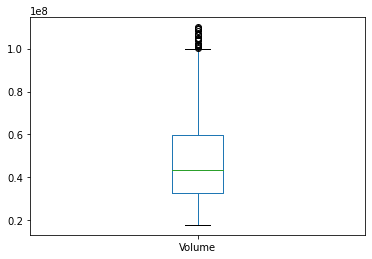

In [12]:
QU = vol.quantile(0.75)
QL = vol.quantile(0.25)
IQR = QU - QL
vol[(vol>(QU + 1.5*IQR)) | (vol<(QU-1.5*IQR))] = np.nan
vol.boxplot(grid=False)

array([[<AxesSubplot:title={'center':'Volume'}>]], dtype=object)

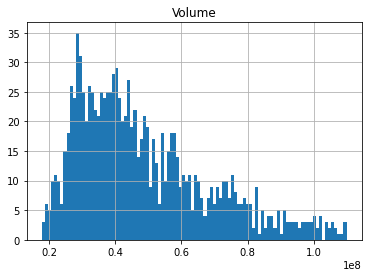

In [13]:
vol.hist(bins=100)